# Table of Contents
1. [Introduction & Library Imports](#introduction)
2. [Clone and Explore the Dataset](#data-acquisition)
3. [Data Visualization](#data-visualization)
4. [Data Preprocessing and Augmentation](#data-augmentation)
5. [Build a Convolutional Neural Network (CNN)](#model-design)
6. [Compile and Train the Model](#model-train)
7. [Performance Evaluation](#performance-evaluation)
8. [Prediction on New Data](#prediction)



## 1. Introduction & Library Imports <a name='introduction'></a>

In this project, I am going to focus on two main learning objectives:

1. Learn to Build and Train the Convolutional Neural network using Keras with Tensorflow as Backend

2. Learn to make use of the trained model to predict on a new set of data

This project is part of a fromation [course](https://www.coursera.org/projects/classification-of-covid19-using-chest-xray-images-in-keras) to learn about Convolutional Neural Network (CNN). The overall objective is to lear how to build and train a convolutional neural network using Keras with TensorFlow as a backend and how to apply augmentation techniques.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

The Conv2D it will transform the input image into an abstract representation, which can be used by the Dense layer to generate a classification. However, as these layer can have only 1 dimensional data, we need to use Flatten to transform it into a 1D format first.

## 2. Clone and Explore the Dataset <a name='data-acquisition'></a>

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 15.30 MiB/s, done.
Updating files: 100% (2295/2295), done.


In [3]:
import os

#set the path to the main dir
main_dir = '/content/datasets/Data'

#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')

#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(190).jpg', 'COVID19(202).jpg', 'COVID19(314).jpg', 'COVID19(120).jpg', 'COVID19(77).jpg', 'COVID19(45).jpg', 'COVID19(457).jpg', 'COVID19(166).jpg', 'COVID19(339).jpg', 'COVID19(136).jpg']
['NORMAL(1025).jpg', 'NORMAL(1526).jpg', 'NORMAL(285).jpg', 'NORMAL(367).jpg', 'NORMAL(62).jpg', 'NORMAL(1008).jpg', 'NORMAL(1560).jpg', 'NORMAL(1143).jpg', 'NORMAL(881).jpg', 'NORMAL(260).jpg']
['COVID19(158).jpg', 'COVID19(58).jpg', 'COVID19(499).jpg', 'COVID19(216).jpg', 'COVID19(186).jpg', 'COVID19(352).jpg', 'COVID-19 (830).jpg', 'COVID-19 (750).jpg', 'COVID19(106).jpg', 'COVID19(220).jpg']
['NORMAL(48).jpg', 'NORMAL(86).jpg', 'NORMAL(314).jpg', 'NORMAL(665).jpg', 'NORMAL(1370).jpg', 'NORMAL(355).jpg', 'NORMAL(332).jpg', 'NORMAL(1190).jpg', 'NORMAL(321).jpg', 'NORMAL(1432).jpg']


In [5]:
#print the total no of images present in each dir
print("Total images present in the training set: ", len(train_covid_names+train_normal_names))
print("Total images present in the testing set: ", len(test_covid_names+test_normal_names))

Total images present in the training set:  1811
Total images present in the testing set:  484


## 3. Data Visualization<a name = 'data-visualization'></a>

['/content/datasets/Data/train/COVID19/COVID19(190).jpg', '/content/datasets/Data/train/COVID19/COVID19(202).jpg', '/content/datasets/Data/train/COVID19/COVID19(314).jpg', '/content/datasets/Data/train/COVID19/COVID19(120).jpg', '/content/datasets/Data/train/COVID19/COVID19(77).jpg', '/content/datasets/Data/train/COVID19/COVID19(45).jpg', '/content/datasets/Data/train/COVID19/COVID19(457).jpg', '/content/datasets/Data/train/COVID19/COVID19(166).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1025).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1526).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(285).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(367).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(62).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1008).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1560).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1143).jpg']


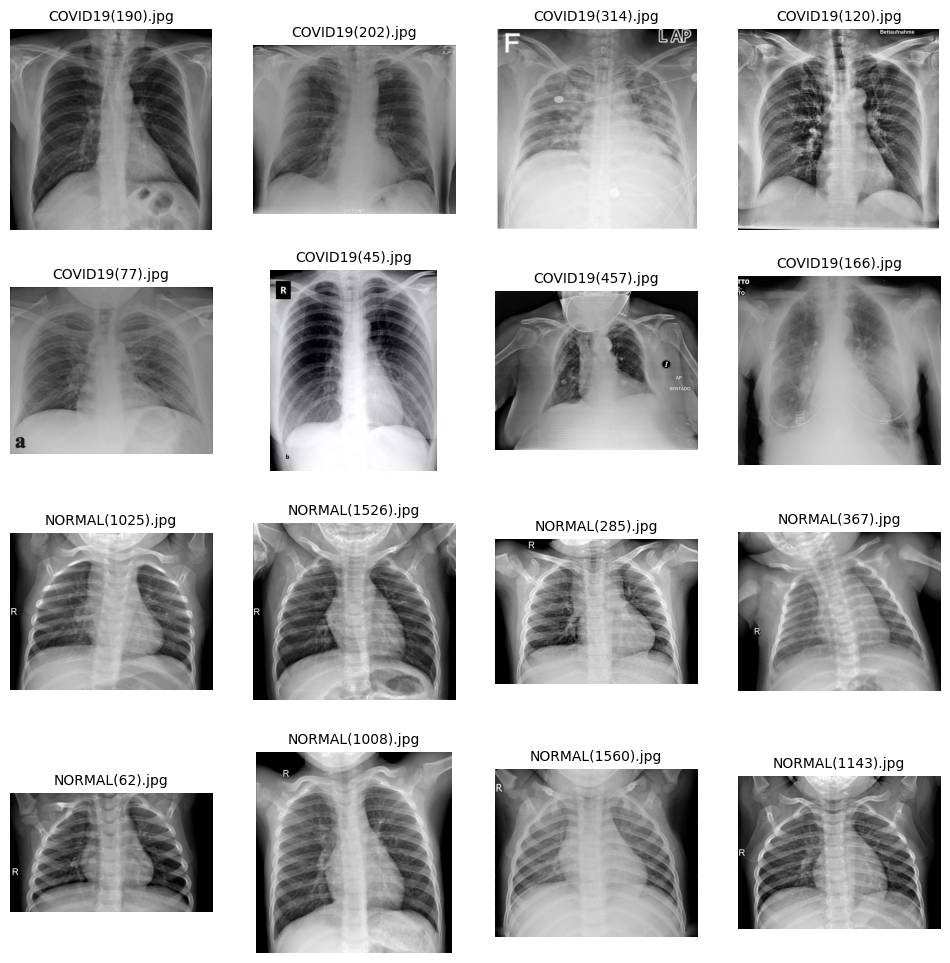

In [6]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[0:8]]

#print the list
print(covid_pic)
print(normal_pic)

#merge the covid and normal list
merge_list = covid_pic+normal_pic
for i, img_path in enumerate(merge_list):
    data = img_path.split('/',6)[6]
    sp = plt.subplot(rows,cols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data,fontsize=10)
    plt.imshow(img,cmap='gray')

plt.show();

## 4. Data Pre-processing and Augmentation <a name='#data-augmentation'></a>

`Data augmentation` is a technique used in machine learning and deep learning to increase the amount of training data by applying various transformations to the existing data. This can be particularly useful when the original dataset is limited in size. By artificially expanding the training dataset, data augmentation can help improve the performance and generalization of models, especially in tasks like image classification.

In the context of images, data augmentation often includes operations such as:

- Rotation: Rotating the image by a certain angle.
- Flipping: Horizontally or vertically flipping the image.
- Zooming: Zooming in or out on the image.
- Cropping: Cutting out a section of the image.
- Brightness and contrast adjustments: Modifying the brightness or contrast of the image.
- Translation: Shifting the image in any direction.
- Noise injection: Adding random noise to the image.
- Shearing: Skewing the image in a certain direction.
- Color variations: Adjusting hue, saturation, and value.

For other types of data, augmentation techniques might vary. For example, in audio data, augmentation might include changing the pitch or speed, adding noise, or stretching the audio.

Benefits of data augmentation:

- Improves model generalization: By training the model on a more diverse set of examples, the model is less likely to overfit to specific patterns in the original training set.
- Compensates for limited data: For datasets that are small, data augmentation can effectively increase their size.
- Invariance: Augmentation can help the model to learn invariant features. For example, by flipping and rotating images, the model learns that the orientation of an object doesn't necessarily change its classification.

However, it's essential to ensure that the augmentations are relevant to the problem domain. Some augmentations might introduce unrealistic scenarios or distortions that can mislead the model during training.


In [7]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150,150),
                                                      subset = 'validation',
                                                      batch_size = 32,
                                                      class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

150 x 150 px, and 3 = rgb

## 5. Build a Convolutional Neural Network (CNN)<a name = '#model-deign'></a>

In [10]:
model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

## 6. Compile and Train the Model<a name = '#model-train' ></a>

In [11]:
#compile the model
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 183s 4s/step - loss: 0.8763 - accuracy: 0.7709 - val_loss: 0.4323 - val_accuracy: 0.9199
Epoch 2/30
46/46 [==============================] - 174s 4s/step - loss: 0.2051 - accuracy: 0.9179 - val_loss: 0.2709 - val_accuracy: 0.9503
Epoch 3/30
46/46 [==============================] - 162s 3s/step - loss: 0.1751 - accuracy: 0.9324 - val_loss: 0.1841 - val_accuracy: 0.9503
Epoch 4/30
46/46 [==============================] - 173s 4s/step - loss: 0.1808 - accuracy: 0.9344 - val_loss: 0.3651 - val_accuracy: 0.8674
Epoch 5/30
46/46 [==============================] - 170s 4s/step - loss: 0.1678 - accuracy: 0.9434 - val_loss: 0.1193 - val_accuracy: 0.9641
Epoch 6/30
46/46 [==============================] - 169s 4s/step - loss: 0.1516 - accuracy: 0.9469 - val_loss: 0.1336 - val_accuracy: 0.9724
Epoch 7/30
46/46 [==============================] - 169s 4s/step - loss: 0.1373 - accuracy: 0.9524 - val_loss: 0.1083 - val_accuracy: 0.9641
Epoch 8/30
46

## 7. Performance Evaluation<a name = '#performance-evaluation'></a>

In [13]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

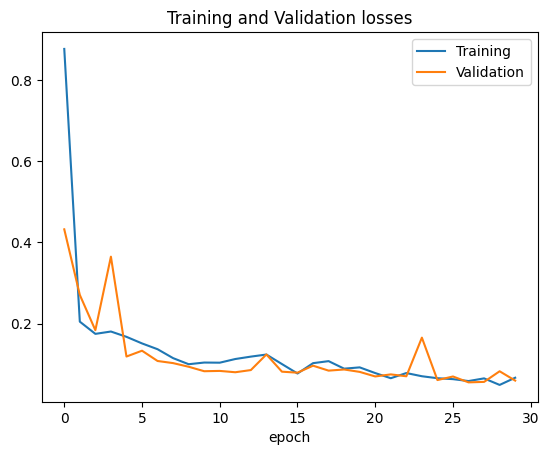

In [14]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training", "Validation"])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

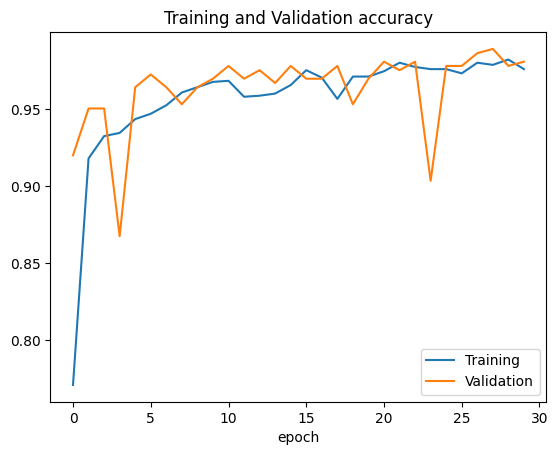

In [15]:
#plot graph between training and validation accuarcy
#plot graph between training and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training", "Validation"])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [16]:
# get the test acuarcy and loss
test_loss , test_accuracy = model.evaluate(test_generator)

16/16 [==============================] - 32s 2s/step - loss: 0.1125 - accuracy: 0.9628


In [17]:
print('test loss :{} test acc :{}'.format(test_loss, test_accuracy))

test loss :0.11245858669281006 test acc :0.9628099203109741


## 8. Prediction of New Data<a name = '#prediction'></a>

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = '/content/' + filename
    img = image.load_img(img_path, target_size=(150, 150))
    images = image.img_to_array(img)
    images = np.expand_dims(images, axis=0)
    prediction = model.predict(images)
    print(filename)

    if prediction[0][0] < 0.5:
        print('COVID detected')
    else:
        print('Your report is normal')

Saving covid1.jpg to covid1.jpg
Saving covid2.jpeg to covid2.jpeg
Saving normal1.jpg to normal1.jpg
Saving normal2.jpg to normal2.jpg
1/1 [==============================] - 0s 264ms/step
covid1.jpg
COVID detected
1/1 [==============================] - 0s 75ms/step
covid2.jpeg
COVID detected
1/1 [==============================] - 0s 77ms/step
normal1.jpg
Your report is normal
1/1 [==============================] - 0s 76ms/step
normal2.jpg
Your report is normal
